## Preguntas a responder

14. Que impacto tiene la duracion de la promocion en el volumen de ventas?
Realizar una comparación entre las ventas y la duración de la promoción, es decir, si la promoción duró más se produjeron más ventas? Esto es un poco complicado porque imagino que de acuerdo al % de descuento puede variar.
15. Relación id_cadena con id_producto, ver que productos vende más una cadena en particular.
16. Con respecto a latitud y longitud, se puede hacer un gráfico que relacione la ubicación con las ventas por ejemplo, para ver si hay alguna zona donde se produzcan más ventas que otras.
17. Cuando se vende mas un producto cuando tiene promociones o cuando no tiene promociones?  Relacionar las ventas del producto si tiene promocion y cuando no tiene promocion.
18. Cuales productos no se venden asi tengan una promocion?
19. Cantidad de inventario de productos que mas se venden?
20. Cantidad de inventario del producto que menos se vende?

In [1]:
# Importamos las librerías:
import matplotlib.pyplot as plt
plt.style.use('classic')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [2]:
datos="D:/Desodorantes/deodorants_final_merged_v1.csv"
df = pd.read_csv(datos, low_memory=False)

In [3]:
df.head(5)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,latitud,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion
0,5205,273921,2019-07-14,7,0,157.03,1,9217,7,2019,...,-34.565295,1,0,freshmatic airwick lavanda repuesto 250.00 mlt,reckitt benckiser argentina s.a.,1,Sunday,1,0,verano
1,9026,273920,2019-07-14,18,0,157.03,1,9217,7,2019,...,-34.608787,1,0,refill citrico oil escence air wick citricos t...,reckitt benckiser argentina s.a.,1,Sunday,1,0,verano
2,5263,468735,2019-07-14,11,0,145.10,1,9217,7,2019,...,-34.609829,1,0,glade automatico 3 en 1 aromatizante de ambien...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano
3,9030,461280,2019-07-14,10,0,145.10,1,9217,7,2019,...,-34.617352,1,0,glade automatico desodorante de ambientes vain...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano
4,9159,470446,2019-07-14,2,0,145.10,1,9217,7,2019,...,-34.672958,1,0,glade automatico ref ed ltda 1 175gx6 pop frut...,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano


In [4]:
df.describe()

,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,mov_weekday,...,nro_prom,duracion_promo,id_cadena,longitud,latitud,local,punto_dist,id_region,is_weekend,tiene_promo
count,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,...,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06
mean,6.989773e+03,3.785508e+05,2.065137e+01,3.136310e-01,6.423475e+01,9.610200e-01,5.434609e+03,6.485025e+00,2.017666e+03,3.002266e+00,...,7.780377e+03,1.485333e-01,4.277160e+00,-5.872835e+01,-3.506354e+01,9.897948e-01,1.020519e-02,9.283848e-01,2.866340e-01,1.630815e-02
std,3.299906e+03,9.158304e+04,1.487243e+02,8.953579e-01,6.580358e+01,1.935474e-01,4.533852e+03,3.453803e+00,9.815391e-01,2.000099e+00,...,6.063741e+04,1.240366e+00,2.618480e+00,1.394684e+00,2.036040e+00,1.005039e-01,1.005039e-01,2.578497e-01,4.521891e-01,1.266578e-01
min,2.420000e+02,1.641460e+05,-5.420000e+02,-4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,-6.749604e+01,-4.587265e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.208000e+03,2.929450e+05,6.000000e+00,0.000000e+00,2.251000e+01,1.000000e+00,0.000000e+00,3.000000e+00,2.017000e+03,1.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,-5.869611e+01,-3.498957e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,9.026000e+03,4.152680e+05,1.000000e+01,0.000000e+00,3.823000e+01,1.000000e+00,9.217000e+03,6.000000e+00,2.018000e+03,3.000000e+00,...,0.000000e+00,0.000000e+00,4.000000e+00,-5.846482e+01,-3.462789e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,9.159000e+03,4.583930e+05,1.700000e+01,0.000000e+00,7.673000e+01,1.000000e+00,9.217000e+03,1.000000e+01,2.018000e+03,5.000000e+00,...,0.000000e+00,0.000000e+00,4.000000e+00,-5.839790e+01,-3.457732e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,9.977000e+03,5.113260e+05,1.621800e+04,6.120000e+02,4.238100e+02,1.000000e+00,9.217000e+03,1.200000e+01,2.019000e+03,6.000000e+00,...,5.410660e+05,1.800000e+01,9.000000e+00,-5.668353e+01,-2.914198e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#### 14. Qué impacto tiene la duración de la promoción en el volumen de ventas?
Realizar una comparación entre las ventas y la duración de la promoción, es decir, si la promoción duró más se produjeron más ventas? 

In [5]:
df_promo_venta = df.groupby('duracion_promo', as_index= False)['venta_unidades'].sum()
df_promo_ventas=df_promo_venta[df_promo_venta['duracion_promo']>0]
df_promo_ventas

,duracion_promo,venta_unidades
1,3,180
2,4,34
3,6,2271
4,7,39458
5,8,6284
6,9,6045
7,10,3893
8,11,179
9,14,2817
10,15,394


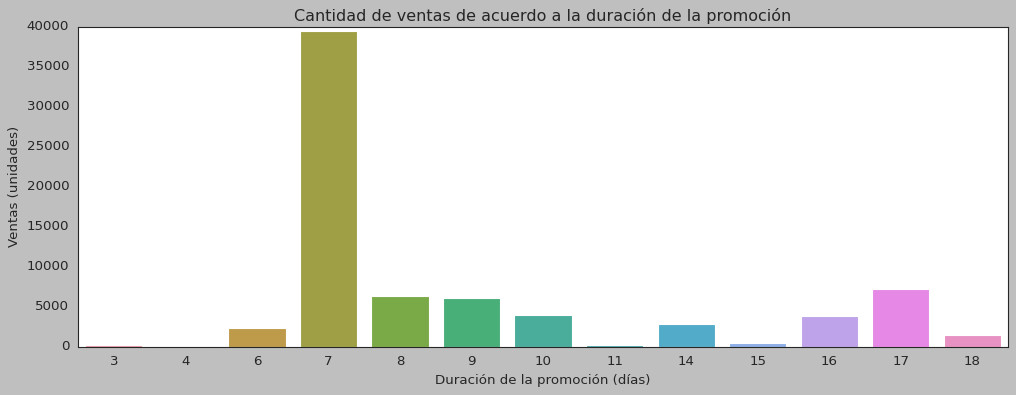

In [6]:
plt.figure(figsize=[15,5])
with sns.axes_style('white'):
    sns.barplot(x='duracion_promo', y='venta_unidades', data=df_promo_ventas, errorbar=None)

        # set the color palette
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title("Cantidad de ventas de acuerdo a la duración de la promoción")
    plt.xlabel('Duración de la promoción (días)')
    plt.ylabel('Ventas (unidades)')

De acuerdo al gráfico obtenido, se puede observar que la mayor cantidad de ventas se producen cuando la duración de la promoción es de 7 días.

#### 15. Relación id_cadena con id_producto, ver qué cadena vende más productos.

In [21]:
# Agrupar por id_cadena e id_producto y sumar las ventas
df_productos_por_cadena = df.groupby(['desc_cadena', 'id_producto']).agg({'venta_unidades': 'sum'}).reset_index()

# Agrupar por id_cadena y sumar las ventas de todos los productos
df_ventas_por_cadena = df_productos_por_cadena.groupby(['desc_cadena']).agg({'venta_unidades': 'sum'}).reset_index()

# Ordenar en orden descendente por ventas
df_ventas_por_cadena = df_ventas_por_cadena.sort_values('venta_unidades', ascending=False)
df_ventas_por_cadena

,desc_cadena,venta_unidades
2,vea,962582
1,jumbo,881481
0,disco,777627


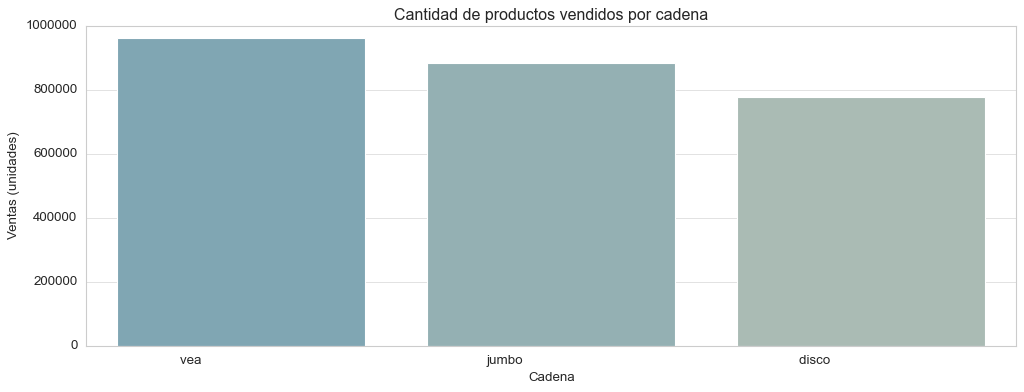

In [45]:
plt.figure(figsize=[15,5])
with sns.axes_style('whitegrid'):
    sns.barplot(x='desc_cadena', y='venta_unidades', data=df_ventas_por_cadena, errorbar=None)

        # set the color palette
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title("Cantidad de productos vendidos por cadena")
    plt.xlabel('Cadena')
    plt.ylabel('Ventas (unidades)')
    plt.savefig(f'images/Cantidad_de_productos_vendidos_por_cadena', dpi=300, bbox_inches='tight')
   

Se puede observar que de las cinco cadenas existentes, sólo las cadenas Disco, Jumbo y Vea son las que presentan ventas productos.

#### 17. Cuándo se vende más un producto cuando tiene promociones o cuando no tiene promociones?  Relacionar las ventas del producto si tiene promoción y cuando no tiene promoción.

#### Análisis realizado para todos los productos en general

In [11]:
df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1]

total_ventas_promo = ventas_promo.venta_unidades.sum()

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1]
ventas_sin_promo = df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 0]

# Calcular la cantidad total de ventas para cada caso
total_ventas_promo = ventas_promo.venta_unidades.sum()
total_ventas_sin_promo = ventas_sin_promo.venta_unidades.sum()

# Imprimir los resultados
print(f"La cantidad total de ventas con promoción es {total_ventas_promo}")
print(f"La cantidad total de ventas sin promoción es {total_ventas_sin_promo}")
if (total_ventas_promo > total_ventas_sin_promo).all():
    print("Se venden más productos con promoción.")
elif (total_ventas_promo < total_ventas_sin_promo).all():
    print("Se venden más productos sin promoción.")
else:
    print("Las ventas con promoción y sin promoción son iguales.")

La cantidad total de ventas con promoción es 74001
La cantidad total de ventas sin promoción es 2546836
Se venden más productos sin promoción.


C:\Users\ro424\AppData\Local\Temp\ipykernel_16884\808845100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()


In [37]:
df_ventas= df.groupby(['id_producto', 'tiene_promo'])['venta_unidades'].mean().reset_index()
df_ventas

,id_producto,tiene_promo,venta_unidades
0,164146,0,0.105091
1,164146,1,0.186275
2,164149,0,0.310996
3,164149,1,0.265641
4,228217,0,0.533954
...,...,...,...
162,507528,1,0.282609
163,507832,0,0.287126
164,511324,0,0.148225
165,511325,0,0.131770


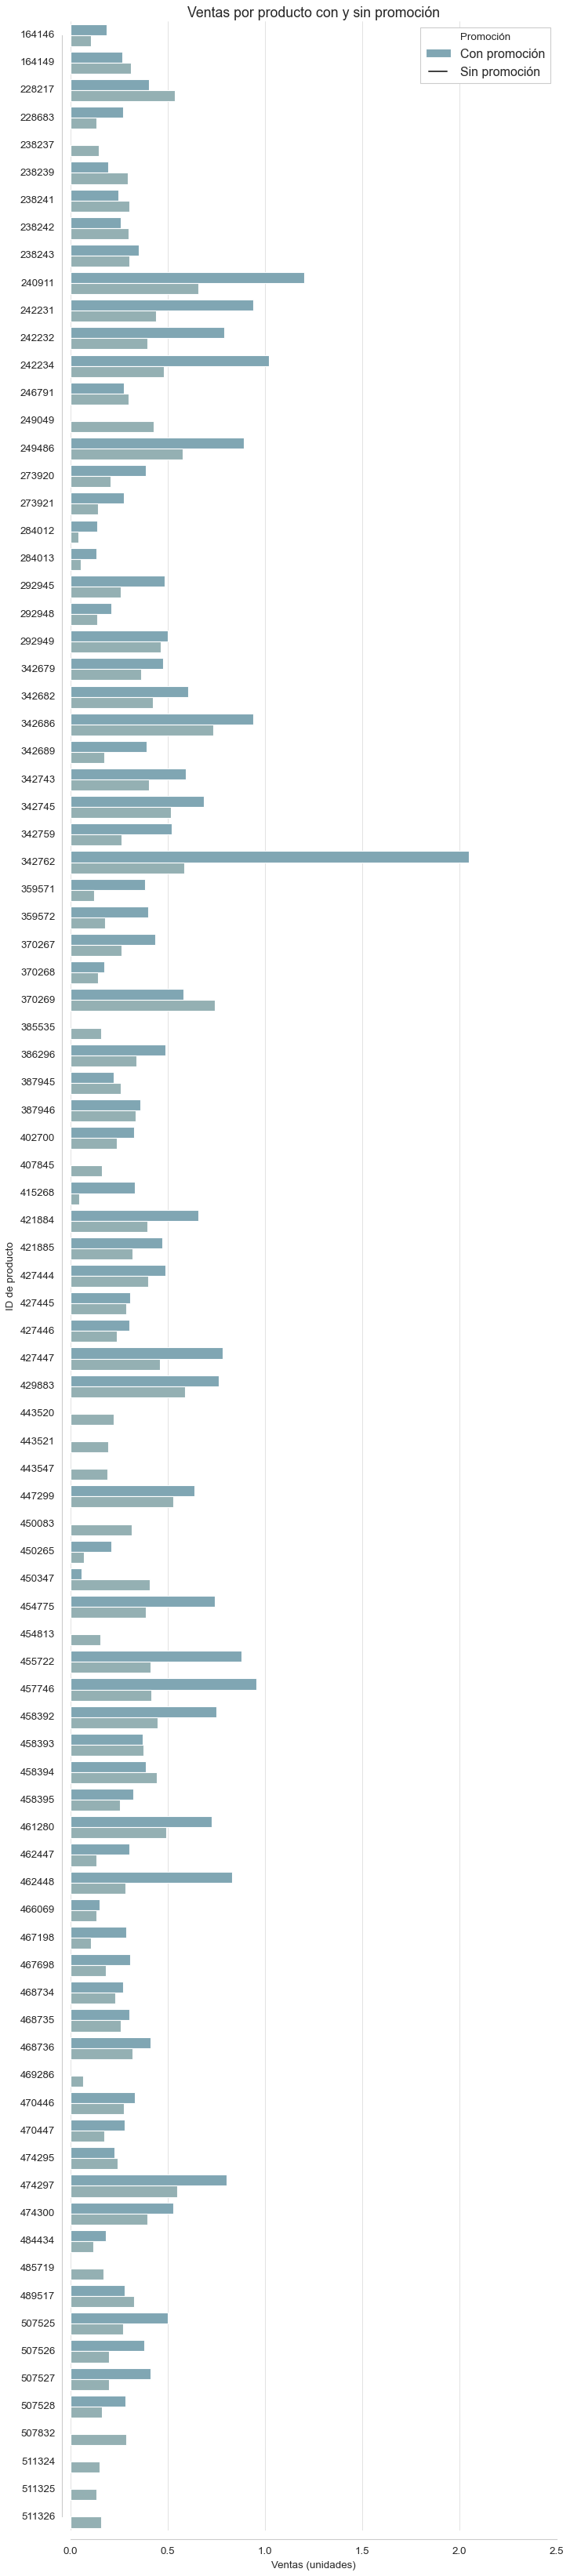

In [44]:
plt.figure(figsize=[10,50])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='venta_unidades', y='id_producto', hue='tiene_promo', data=df_ventas, orient='h',  hue_order=[1, 0])
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Ventas por producto con y sin promoción', fontsize=16)
    plt.xlabel('Ventas (unidades)', fontsize=12)
    plt.ylabel('ID de producto', fontsize=12)
    bars = ax.containers
    bar1 = bars[0]
    bar2 = bars[1]
    bar1.patches[0].set_label('Sin promoción')
    bar2.patches[1].set_label('Con promoción')
    plt.legend(title='Promoción', labels=['Con promoción', 'Sin promoción'])
    plt.savefig(f'images/Ventas por producto con y sin promoción', dpi=300, bbox_inches='tight')
plt.show()

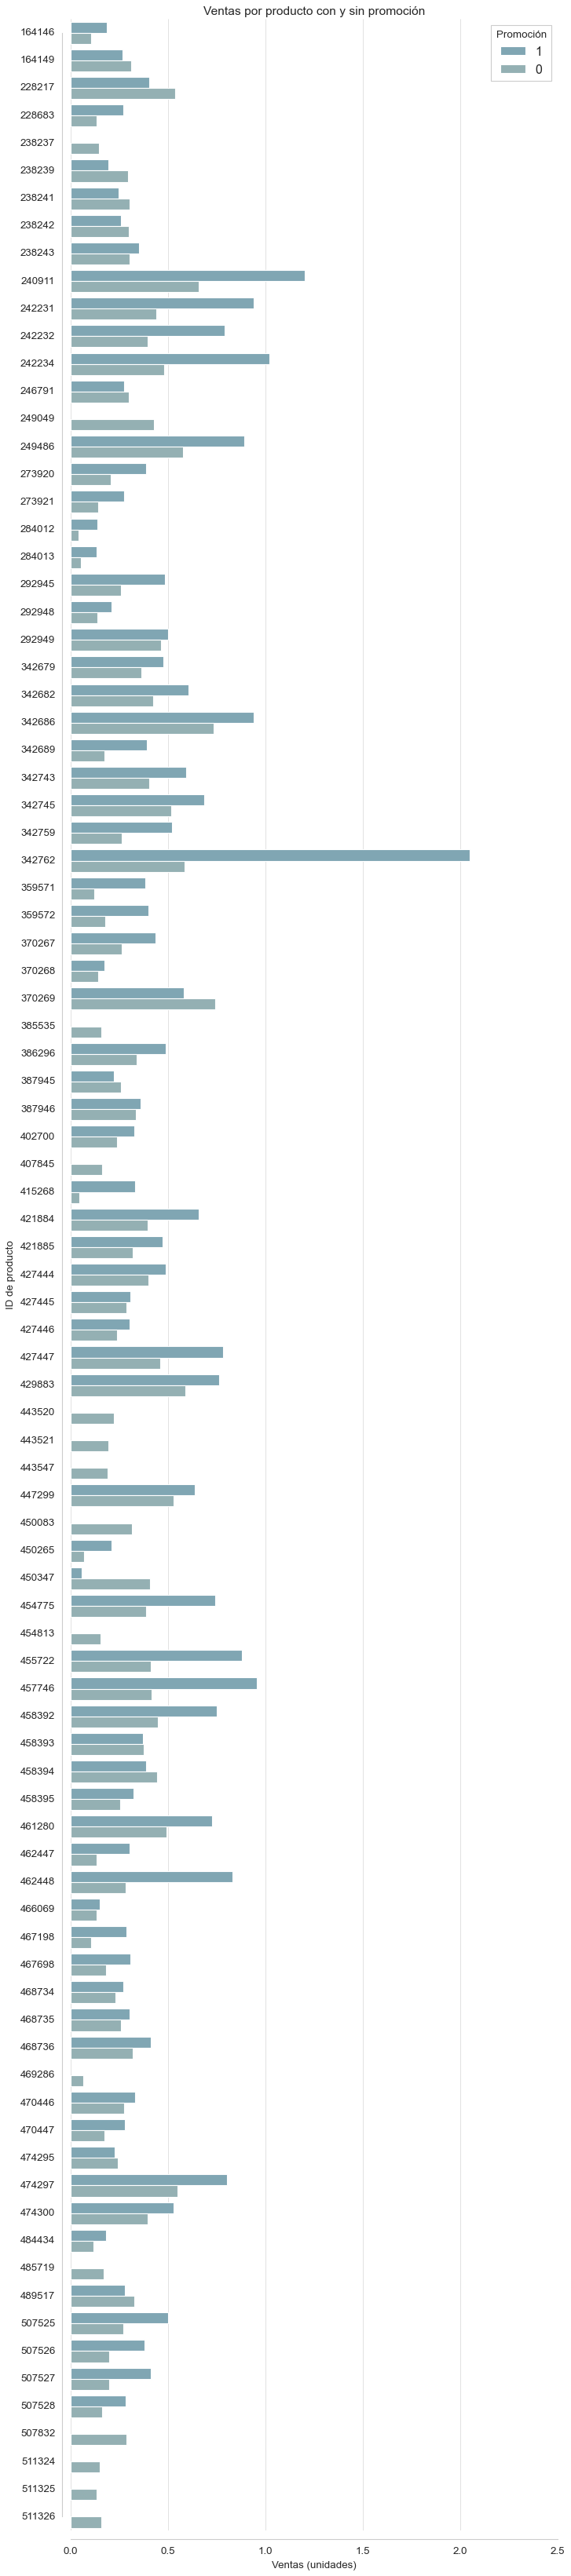

In [42]:
plt.figure(figsize=[10,50])
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='venta_unidades', y='id_producto', hue='tiene_promo', data=df_ventas, orient='h',  hue_order=[1, 0])
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.title('Ventas por producto con y sin promoción', fontsize=14)
    plt.xlabel('Ventas (unidades)', fontsize=12)
    plt.ylabel('ID de producto', fontsize=12)
    #bar1.patches[0].set_label('Sin promoción')
    #bar2.patches[1].set_label('Con promoción')
    plt.legend(title='Promoción') #, labels=['Con promoción', 'Sin promoción'])
    plt.savefig(f'images/Ventas por producto con y sin promoción', dpi=300, bbox_inches='tight')
    
plt.show()

#### Análisis realizado para aquellos productos que se venden con y sin promoción 

In [13]:
df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()

# Obtener los id_producto que tienen ventas con promoción y sin promoción
id_producto_con_promo = set(df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 1, 'id_producto'].unique())
id_producto_sin_promo = set(df_ventas_promo.loc[df_ventas_promo['tiene_promo'] == 0, 'id_producto'].unique())

# Obtener la intersección de ambos conjuntos
id_producto_en_ambos = id_producto_con_promo.intersection(id_producto_sin_promo)

# Filtrar el DataFrame original por los id_producto en ambos conjuntos
df_ventas_en_ambos = df.loc[df['id_producto'].isin(id_producto_en_ambos)]

# Obtener las ventas cuando tiene promoción y cuando no tiene promoción
ventas_promo = df_ventas_en_ambos.loc[df['tiene_promo'] == 1]
ventas_sin_promo = df_ventas_en_ambos.loc[df['tiene_promo'] == 0]

# Calcular la cantidad total de ventas para cada caso
total_ventas_promo = ventas_promo.venta_unidades.sum()
total_ventas_sin_promo = ventas_sin_promo.venta_unidades.sum()

# Imprimir los resultados
print(f"La cantidad total de ventas con promoción es {total_ventas_promo}")
print(f"La cantidad total de ventas sin promoción es {total_ventas_sin_promo}")
if total_ventas_promo > total_ventas_sin_promo:
    print("Se venden más productos con promoción.")
elif total_ventas_promo < total_ventas_sin_promo:
    print("Se venden más productos sin promoción.")
else:
    print("Las ventas con promoción y sin promoción son iguales.")

C:\Users\ro424\AppData\Local\Temp\ipykernel_16884\2072268022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ventas_promo = df.groupby(['id_producto', 'tiene_promo']).sum()['venta_unidades'].reset_index()


La cantidad total de ventas con promoción es 74001
La cantidad total de ventas sin promoción es 2366298
Se venden más productos sin promoción.


#### 18. Qué productos no se venden así tengan una promoción?
Terminar este punto

In [39]:

id_producto_sin_ventas = set(df.loc[(df['tiene_promo'] == 1) & (df['venta_unidades'] == 0), 'id_producto'])
id_producto_sin_ventas

{164146,
 164149,
 228217,
 228683,
 238239,
 238241,
 238242,
 238243,
 240911,
 242231,
 242232,
 242234,
 246791,
 249486,
 273920,
 273921,
 284012,
 284013,
 292945,
 292948,
 292949,
 342679,
 342682,
 342686,
 342689,
 342743,
 342745,
 342759,
 342762,
 359571,
 359572,
 370267,
 370268,
 370269,
 386296,
 387945,
 387946,
 402700,
 415268,
 421884,
 421885,
 427444,
 427445,
 427446,
 427447,
 429883,
 447299,
 450265,
 450347,
 454775,
 455722,
 457746,
 458392,
 458393,
 458394,
 458395,
 461280,
 462447,
 462448,
 466069,
 467198,
 467698,
 468734,
 468735,
 468736,
 470446,
 470447,
 474295,
 474297,
 474300,
 484434,
 489517,
 507525,
 507526,
 507527,
 507528}

#### 19. Cantidad de inventario de productos que más se venden?

In [14]:

# Obtener la cantidad total de unidades vendidas por producto
total_unidades_vendidas = df.groupby('id_producto')['venta_unidades'].sum()

# Ordenar los resultados por cantidad de unidades vendidas
total_unidades_vendidas = total_unidades_vendidas.sort_values(ascending=False)

# Obtener la cantidad total de inventario por producto
total_inventario = df.groupby('id_producto')['stock_unidades'].sum()

# Fusionar los resultados anteriores en un nuevo DataFrame
df_resumen = pd.concat([total_unidades_vendidas, total_inventario], axis=1, join='inner')

# Ordenar el resultado por la cantidad total de unidades vendidas
df_resumen = df_resumen.sort_values(by='venta_unidades', ascending=False)

# Mostrar los primeros 10 productos con mayor cantidad de unidades vendidas y su inventario correspondiente
print(df_resumen.head(10))

             venta_unidades  stock_unidades
id_producto                                
342686               109531         7484003
240911               100861         5491416
429883                89345         3732450
249486                86737         3337434
342745                72907         5031183
228217                68809         3325219
242234                68083         4250074
447299                66318         2857150
292949                64371         3391324
242231                62046         4173632


#### 20. Cantidad de inventario del producto que menos se vende?

In [28]:
menos_vendido = df[df['venta_unidades'] == df['venta_unidades'].min()]
menos_vendido

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,latitud,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion
3923898,5213,427444,2017-10-14,90,-45,73.78,1,0,10,2017,...,-34.621431,1,0,glade aerosol gld automatico rep manzana y can...,s. c. johnson y son de arg. s.a.,1,Saturday,1,0,otono


In [29]:
inventario_menos_vendido = menos_vendido['stock_unidades'].iloc[0]
inventario_menos_vendido

90

#### 21. Cantidad de inventario de los productos que menos se venden?

In [37]:
# Agrupar por id_producto y sumar las unidades vendidas
df_unidades_vendidas = df.groupby('id_producto')['venta_unidades'].sum()

# Ordenar el DataFrame de manera ascendente según las unidades vendidas
df_unidades_vendidas = df_unidades_vendidas.sort_values()

# Seleccionar los últimos productos (los que menos se venden)
df_menos_vendidos = df_unidades_vendidas.head().reset_index()
df_menos_vendidos

,id_producto,venta_unidades
0,497936,0
1,511325,1983
2,284013,2562
3,466069,2812
4,511324,2927


In [38]:
# Obtener la cantidad de inventario de los productos seleccionados
df_cantidad_inventario = df.loc[df['id_producto'].isin(df_menos_vendidos.index), 'stock_unidades']
df_cantidad_inventario

Series([], Name: stock_unidades, dtype: int64)

#### Comparativa de ventas de productos por meses de acuerdo al año

In [46]:
df_ventas_mes_prod= df.groupby(['id_producto', 'mov_month', 'mov_year'])['venta_unidades'].sum().reset_index()
df_ventas_mes_prod

,id_producto,mov_month,mov_year,venta_unidades
0,164146,1,2017,106
1,164146,1,2018,114
2,164146,1,2019,236
3,164146,2,2017,120
4,164146,2,2018,104
...,...,...,...,...
3099,511326,5,2019,514
3100,511326,6,2019,583
3101,511326,7,2019,214
3102,511326,11,2018,69


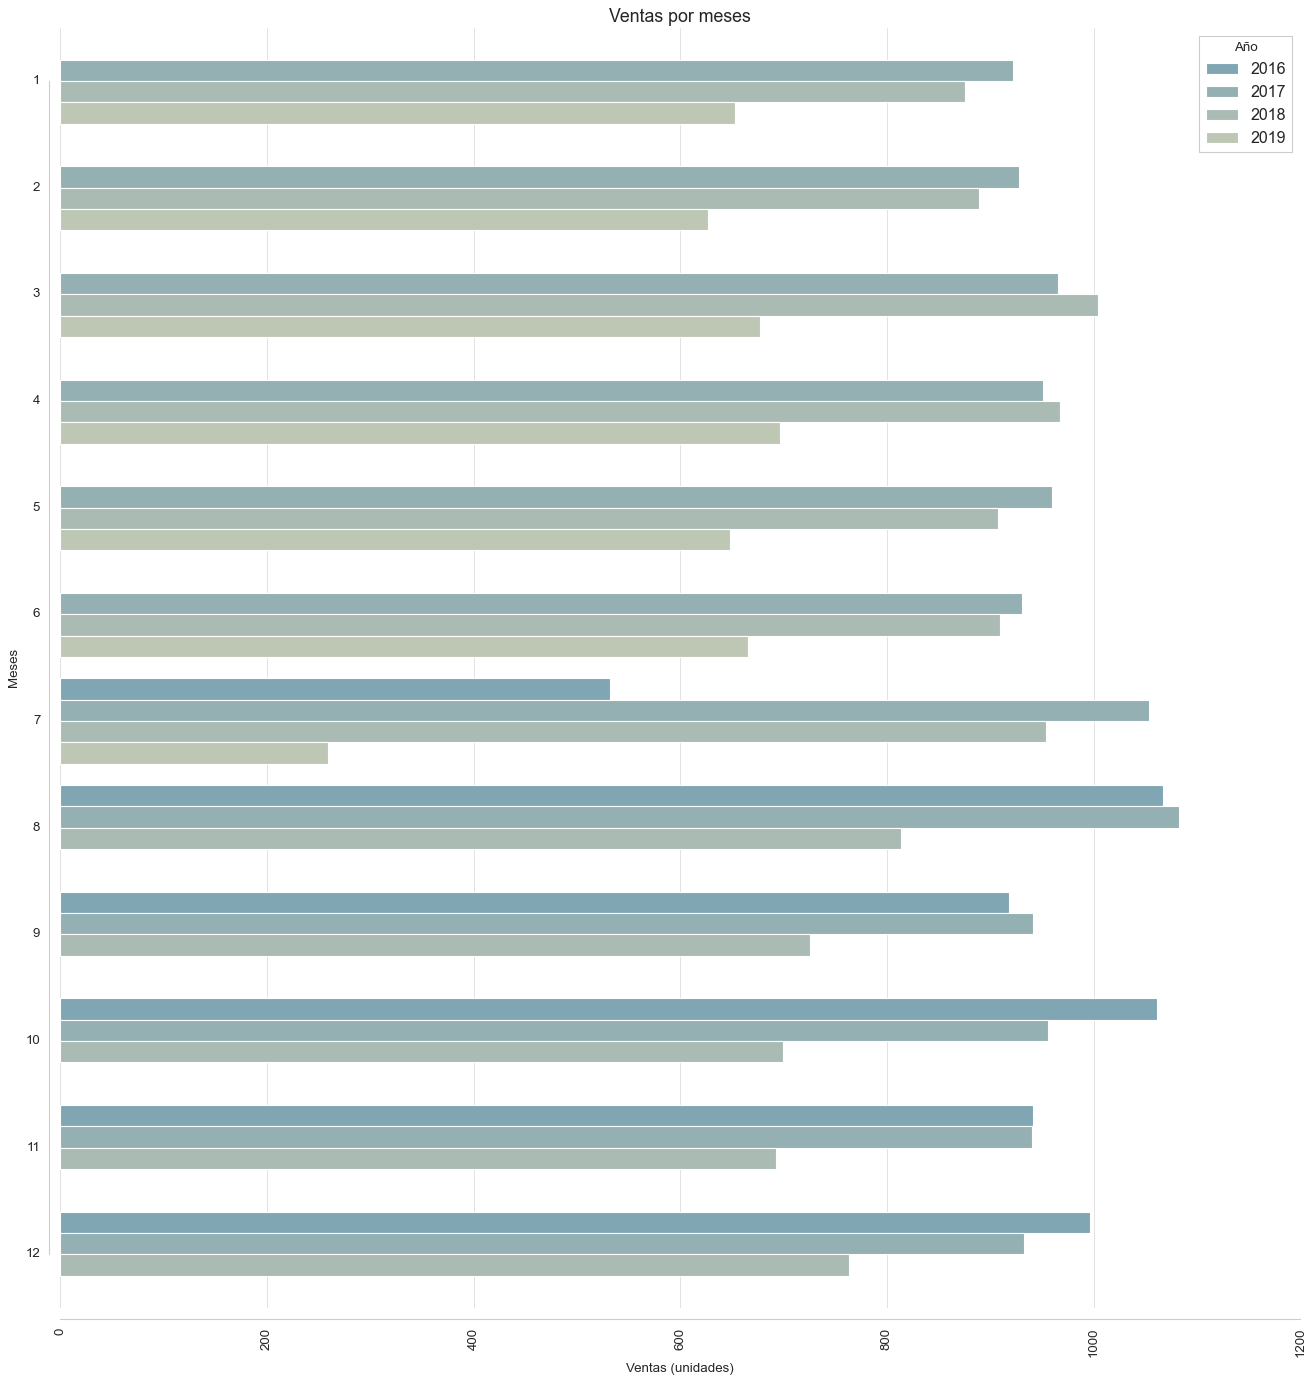

In [49]:
plt.figure(figsize=[20,20])
with sns.axes_style('whitegrid'):
    sns.barplot(x='venta_unidades', y='mov_month', data= df_ventas_mes_prod, hue= 'mov_year', orient= 'h', errorbar=None)
    sns.despine(offset=10, trim=True)
    color = "blend:#7AB,#EDA"
    sns.set_palette(sns.color_palette(color))
    plt.xticks(rotation=90)
    plt.title('Ventas por meses', fontsize=16)
    plt.xlabel('Ventas (unidades)')
    plt.ylabel('Meses')
    plt.legend(title='Año')
    plt.savefig(f'images/Ventas_por_meses', dpi=300, bbox_inches='tight')

División por zonas, Ventas por zonas

In [ ]:
df_ventas_zona= df.groupby(['id_producto', 'mov_month', 'mov_year'])['venta_unidades'].sum().reset_index()
df_ventas_zona